In [1]:
import os

In [2]:
import os 
from tqdm import tqdm
import torch
import numpy as np 
import random 
import pandas as pd 
from box import Box
import cv2
from tqdm import tqdm
import os
import torch.nn as nn
import numpy as np
import pandas as pd
import torch
import random
import albumentations as A
from torch.utils.data import DataLoader, Dataset
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

# Считываем рут по которому будем делать предсказание:
config = Box()
config.num_workers = os.cpu_count()
config.size = 512
config.batch_size = 32
config.model_name = "efficientnet-b7"

config.th = 0.2
config.TTA = True 
config.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



class CustomModel(nn.Module):
    def __init__(self, backbone_name,in_channels , weight=None):
        super().__init__()

        self.encoder = smp.UnetPlusPlus(
            encoder_name=backbone_name,
            encoder_weights=weight,
            in_channels = in_channels,
            classes=1,
            activation=None,
        )

    def forward(self, images: torch.Tensor):

        output = self.encoder(images)
        return output
    
model_1 = CustomModel(backbone_name=config.model_name,
                        weight=None,
                        in_channels=3)
model_1.load_state_dict(torch.load(
    "23_June_2023_15_16_1_2_3_4_5_6_efficientnet-b7/efficientnet-b7_fold_1_last_epochs.pt", 
                                   map_location= config.device)
                       )
model_1.to(config.device)


model_2 = CustomModel(backbone_name=config.model_name,
                        weight=None,
                        in_channels=3)
model_2.load_state_dict(
    torch.load(
        "23_June_2023_15_16_1_2_3_4_5_6_efficientnet-b7/efficientnet-b7_fold_2_last_epochs.pt",
               map_location= config.device)
)
model_2.to(config.device)


model_3 = CustomModel(backbone_name=config.model_name,
                        weight=None,
                        in_channels=3)
model_3.load_state_dict(
    torch.load(
        "23_June_2023_15_16_1_2_3_4_5_6_efficientnet-b7/efficientnet-b7_fold_3_last_epochs.pt", 
        map_location= config.device)
)
model_3.to(config.device)


model_4 = CustomModel(backbone_name=config.model_name,
                        weight=None,
                        in_channels=3)
model_4.load_state_dict(
    torch.load(
        "23_June_2023_15_16_1_2_3_4_5_6_efficientnet-b7/efficientnet-b7_fold_4_last_epochs.pt", 
        map_location= config.device)
)
model_4.to(config.device)

model_5 = CustomModel(backbone_name=config.model_name,
                        weight=None,
                        in_channels=3)
model_5.load_state_dict(
    torch.load(
        "23_June_2023_15_16_1_2_3_4_5_6_efficientnet-b7/efficientnet-b7_fold_5_last_epochs.pt", 
        map_location= config.device)
)
model_5.to(config.device)

model_6 = CustomModel(backbone_name=config.model_name,
                        weight=None,
                        in_channels=3)
model_6.load_state_dict(
    torch.load(
        "23_June_2023_15_16_1_2_3_4_5_6_efficientnet-b7/efficientnet-b7_fold_6_last_epochs.pt", 
        map_location= config.device)
)
model_6.to(config.device)



config.device

device(type='cuda')

In [3]:
size = 512
th = 0.2
aug = A.Compose([
                A.Resize(size, size),
                ToTensorV2()])
        
    
import matplotlib.pyplot as plt 

In [4]:
model_1.eval()
model_2.eval()
model_3.eval()
model_4.eval()
model_5.eval()
model_6.eval()

CustomModel(
  (encoder): UnetPlusPlus(
    (encoder): EfficientNetEncoder(
      (_conv_stem): Conv2dStaticSamePadding(
        3, 64, kernel_size=(3, 3), stride=(2, 2), bias=False
        (static_padding): ZeroPad2d((0, 1, 0, 1))
      )
      (_bn0): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_blocks): ModuleList(
        (0): MBConvBlock(
          (_depthwise_conv): Conv2dStaticSamePadding(
            64, 64, kernel_size=(3, 3), stride=[1, 1], groups=64, bias=False
            (static_padding): ZeroPad2d((1, 1, 1, 1))
          )
          (_bn1): BatchNorm2d(64, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (_se_reduce): Conv2dStaticSamePadding(
            64, 16, kernel_size=(1, 1), stride=(1, 1)
            (static_padding): Identity()
          )
          (_se_expand): Conv2dStaticSamePadding(
            16, 64, kernel_size=(1, 1), stride=(1, 1)
            (static_pad

In [22]:
path_for_data = "../data_7/valid"
lst_folders = os.listdir(path_for_data)

In [23]:
len(lst_folders)

1856

In [24]:
flag = True 
with torch.no_grad():
    for i in tqdm(range(len(lst_folders))):
        fold = lst_folders[i]
        
        img_path = os.path.join(path_for_data, str(fold), 'img.npy')
        image = np.load(img_path)
#         plt.figure(figsize=(12, 6))
#         ax = plt.subplot(1, 2, 1)
#         ax.imshow(image)
        image = aug(image=image)['image']
        image = torch.unsqueeze(image, 0).to(config.device)
        
    
        pred_1 = torch.sigmoid(model_1.forward(image))
        pred_2 = torch.sigmoid(model_2.forward(image))
        pred_3 = torch.sigmoid(model_3.forward(image))
        pred_4 = torch.sigmoid(model_4.forward(image))
        pred_5 = torch.sigmoid(model_5.forward(image))
        pred_6 = torch.sigmoid(model_6.forward(image))
        
        pred = (pred_1 + pred_2 + pred_3 + pred_4 + pred_5 + pred_6) / 6
        pred = torch.nn.functional.interpolate(pred, size=256, mode='bilinear')
        pred = pred.detach().cpu().numpy().astype(np.float16)
        pred_mask = (pred > th ).astype('uint8')
        
        mask_save_path = os.path.join(path_for_data, str(fold), 'human_pixel_mask.npy')
        np.save(mask_save_path, pred_mask)
        
#         ax = plt.subplot(1, 2, 2)
#         ax.imshow(pred_mask.reshape(256, 256), interpolation='none')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1856/1856 [23:00<00:00,  1.34it/s]


In [8]:
# lst_folders

  1%|▉                                                                                                     | 16/1856 [00:14<27:02,  1.13it/s]


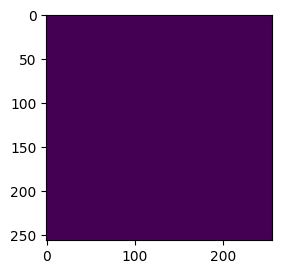

In [9]:
flag = True 
with torch.no_grad():
    for i in tqdm(range(len(lst_folders))):
        if i > 15 : break
        fold = lst_folders[i]
        
        img_path = os.path.join(path_for_data, str(fold), 'img.npy')
        image = np.load(img_path)
#         plt.figure(figsize=(12, 6))
#         ax = plt.subplot(1, 2, 1)
#         ax.imshow(image)
        image = aug(image=image)['image']
        image = torch.unsqueeze(image, 0).to(config.device)
        
    
        pred_1 = torch.sigmoid(model_1.forward(image))
        pred_2 = torch.sigmoid(model_2.forward(image))
        pred_3 = torch.sigmoid(model_3.forward(image))
        pred_4 = torch.sigmoid(model_4.forward(image))
        pred_5 = torch.sigmoid(model_5.forward(image))
        pred_6 = torch.sigmoid(model_6.forward(image))
        
        pred = (pred_1 + pred_2 + pred_3 + pred_4 + pred_5 + pred_6) / 6
        pred = torch.nn.functional.interpolate(pred, size=256, mode='bilinear')
        pred = pred.detach().cpu().numpy().astype(np.float16)
        pred_mask = (pred > th ).astype('uint8')
        
#         mask_save_path = os.path.join(path_for_data, str(fold), 'human_pixel_mask.npy')
#         np.save(mask_save_path, pred_mask)
        
        ax = plt.subplot(1, 2, 2)
        ax.imshow(pred_mask.reshape(256, 256), interpolation='none')